#### Mini Project 2 - Cifar10 Object Classification CNN Model ####

1. Please write code in the cells marked ' # TO DO '
2. Read all the comments in every cell so you do not miss out any instruction.
3. Please do not change any variable names as the rest of the pre-populated code look for those variables.
4. Please also make sure you have read the project instructions document.

In [2]:
# Import Modules that will be required for this project
# Set Random Seed for consistency

import numpy as np
import torch
from matplotlib import pyplot as plt
import pandas as pd

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
from torchsummary import summary

import os

from skimage import io,transform
from skimage.color import rgb2gray


import warnings
warnings.filterwarnings('ignore')

torch.manual_seed(1)

In [3]:
# Check if GPU is available else run on CPU

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# TO DO

# Please enter, between the quotes', the data path for your directory or folder where you want to save your model
# This example is mine
# Do not change the variable name 'data_path'

data_path = '/Users/12053/INFO4150/MP2/'

In [5]:
# This cell is not important but it can show you the files in your directory to chjeck the path ios correct
# Comment it out if you do not need it.

for root, dirs, files in os.walk(data_path, topdown=False):
        for name in files:
              print(os.path.join(root, name))

/Users/12053/INFO4150/MP2/.ipynb_checkpoints\Samuel_Bernal_MP2-checkpoint.ipynb
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\caffe2\contrib\aten\docs\__pycache__\sample.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\caffe2\contrib\aten\docs\__pycache__\__init__.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\caffe2\contrib\aten\docs\sample.py
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\caffe2\contrib\aten\docs\__init__.py
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\caffe2\contrib\aten\__pycache__\aten_test.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\caffe2\contrib\aten\__pycache__\gen_op.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\caffe2\contrib\aten\__pycache__\__init__.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\caffe2\contrib\aten\aten_test.py
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\caffe2\contrib\aten\gen_op.py
/Users/12053/INFO4150

/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\setuptools\_distutils\command\__pycache__\bdist.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\setuptools\_distutils\command\__pycache__\bdist_dumb.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\setuptools\_distutils\command\__pycache__\bdist_msi.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\setuptools\_distutils\command\__pycache__\bdist_rpm.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\setuptools\_distutils\command\__pycache__\bdist_wininst.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\setuptools\_distutils\command\__pycache__\build.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\setuptools\_distutils\command\__pycache__\build_clib.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\setuptools\_distutils\command\__pycache__\build_ext.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\sit

/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\include\ATen\ops\abs.h
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\include\ATen\ops\absolute.h
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\include\ATen\ops\absolute_compositeimplicitautograd_dispatch.h
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\include\ATen\ops\absolute_native.h
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\include\ATen\ops\absolute_ops.h
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\include\ATen\ops\abs_compositeexplicitautograd_dispatch.h
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\include\ATen\ops\abs_cpu_dispatch.h
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\include\ATen\ops\abs_cuda_dispatch.h
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\include\ATen\ops\abs_native.h
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\include\ATen\ops\abs_ops.h
/Users/12053/INFO4150/MP2/mp2_venv\Lib\si

/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\nn\quantized\dynamic\__pycache__\__init__.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\nn\quantized\dynamic\__init__.py
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\nn\quantized\modules\__pycache__\activation.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\nn\quantized\modules\__pycache__\batchnorm.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\nn\quantized\modules\__pycache__\conv.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\nn\quantized\modules\__pycache__\dropout.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\nn\quantized\modules\__pycache__\embedding_ops.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\nn\quantized\modules\__pycache__\functional_modules.cpython-39.pyc
/Users/12053/INFO4150/MP2/mp2_venv\Lib\site-packages\torch\nn\quantized\modules\__p

In [6]:
# Read in the data files
# Keep the dataframe names unchanged as they are used later on
# The data files should be in the same directory as the .ipynb file

Cifar_data =  pd.read_csv('cifar10.csv')
Cifar_test = pd.read_csv('cifar_test.csv')

In [7]:
Cifar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1


In [8]:
# Get a good understanding of what is being done to build this class
# You will answer about it in the Questions section

class cifar(Dataset):

    def __init__(self, data,transforms=None):
        self.image = data.drop(columns=['label'])
        self.labels = data['label']
        self.transforms = transforms
        

    def __len__(self):
        return len(self.labels)


    def __getitem__(self,idx):

        img = np.array(self.image.iloc[idx]).reshape(3,32,32).transpose(1,2,0)
        img = img/255.0
        img = rgb2gray(img)
        img = img.reshape(1,32,32)
        
        label = self.labels[idx]
        label = np.array(label).reshape(-1,1)
        
        if self.transforms is not None:
            img = self.transforms(img)
                               
        return torch.from_numpy(img),torch.from_numpy(label)

In [9]:
# Amount of data - train and test while testing the __len__ method

train_data =  cifar(Cifar_data)
test_data =  cifar(Cifar_test)
print(f"Data Length of train and test set:{train_data.__len__(),test_data.__len__()}")
print(f"\nCheck data is loaded and test data shape:\n\n{train_data[0][1]},\n\n{train_data[0][0],test_data[0][0].shape}")

Data Length of train and test set:(50000, 10000)

Check data is loaded and test data shape:

tensor([[6]]),

(tensor([[[0.2409, 0.1776, 0.1885,  ..., 0.5325, 0.5062, 0.5003],
         [0.0751, 0.0000, 0.0374,  ..., 0.3649, 0.3462, 0.3619],
         [0.0941, 0.0330, 0.1188,  ..., 0.3481, 0.3498, 0.3075],
         ...,
         [0.6774, 0.6064, 0.6240,  ..., 0.5263, 0.1356, 0.1452],
         [0.5671, 0.5011, 0.5675,  ..., 0.5951, 0.2644, 0.2275],
         [0.5843, 0.5285, 0.5721,  ..., 0.7358, 0.4806, 0.3810]]],
       dtype=torch.float64), torch.Size([1, 32, 32]))


Shape of Image as it comes from the get_item method:torch.Size([1, 32, 32]),

Data type of image and label:(<class 'torch.Tensor'>, <class 'torch.Tensor'>)

Image has been reshaped for display purposes only:(32, 32)
Shape of the label:torch.Size([1, 1])



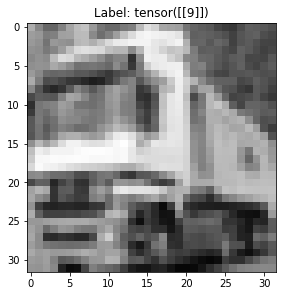

In [10]:
# Look at an image - this also tests the __getitem__ method
# This also gives a check point on shape and that we have a tensor.

image1,label1 = train_data.__getitem__(1)
print(f"Shape of Image as it comes from the get_item method:{image1.shape},\n\nData type of image and label:{type(image1),type(label1)}\n")
image1 = (image1.numpy()).reshape(32,32)
print(f"Image has been reshaped for display purposes only:{image1.shape}")
print(f"Shape of the label:{label1.shape}\n")
io.imshow(image1)
plt.title('Label: '+str(label1))
plt.show()

In [11]:
# Inititalize the Dataloader Class

train_loader = DataLoader(dataset=train_data, batch_size=100,shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=100,shuffle=False)

In [12]:
# Check Dataloader is getting the correct inputs and that it is generating the batches

for i , (x_batch,y_batch) in enumerate(train_loader):     
    break
print(f"Check batch is being loaded as expected:{x_batch.shape,y_batch.shape}")

Check batch is being loaded as expected:(torch.Size([100, 1, 32, 32]), torch.Size([100, 1, 1]))


In [13]:
# Do not change the name, Net, of the class as it is used later

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
    
        # conv_layer(in_channel, out_channel, kernel, stride, padding)
        
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) # layer 1
        
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1) # layer 2
        self.conv2_drop = nn.Dropout2d(p=0.2) # drop
        
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1) # layer 3
        
        self.fc1 = nn.Linear(8*8*128, 1000)
        self.fc2 = nn.Linear(1000,50)
        self.fc3 = nn.Linear(50, 10)
       

    def forward(self, x):
        # layer 1
        x = self.conv1(x)
        x = F.relu(x) # activation fxn1
        x = F.max_pool2d(x,2)
        
        # layer 2
        x = self.conv2(x)
        x = self.conv2_drop(x) # drop out features because parameters are getting large
        x = F.relu(x) #activation fx2
        x = F.max_pool2d(x,2)
        
        #layer 2
        x = F.relu(self.conv3(x))
        x = x.view(-1, 8*8*128)
        
        #begin flattening
        x = F.relu(self.fc1(x))
        
        # Dropout will work only during training with that comment
        x = F.dropout(x, training=self.training) 
        x = self.fc2(x)
        x = self.fc3(x)
        
        return x

In [14]:
model = Net()
summary(model,(1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             320
            Conv2d-2           [-1, 64, 16, 16]          18,496
         Dropout2d-3           [-1, 64, 16, 16]               0
            Conv2d-4            [-1, 128, 8, 8]          73,856
            Linear-5                 [-1, 1000]       8,193,000
            Linear-6                   [-1, 50]          50,050
            Linear-7                   [-1, 10]             510
Total params: 8,336,232
Trainable params: 8,336,232
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.57
Params size (MB): 31.80
Estimated Total Size (MB): 32.37
----------------------------------------------------------------


In [15]:
# Initialize parameters 
# Try the SGD optimizer and then run it with Adam by uncommenting it
# Choose which one you want to retain based on model performance

lr = 0.001
n_epochs = 1
log_interval = 10
loss_fn = nn.CrossEntropyLoss() 

optimizer = optim.Adam(model.parameters(),lr=lr)

In [16]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_data) for i in range(n_epochs + 1)]

In [17]:
# Function that runs the Train step
# It is first set to training mode

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data,target = data.float(),target.long()
        optimizer.zero_grad()
        output = model(data)
        
        output = torch.squeeze(output)
        target = torch.squeeze(target)
        #print(output.shape,target.shape)
        loss = loss_fn(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_data),
                100. * batch_idx* len(data) / len(train_data), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*100) + ((epoch-1)*len(train_data)))
            torch.save(model.state_dict(), data_path+'model.pth')
            torch.save(model, data_path+'model_final')
            #torch.save(optimizer.state_dict(), data_path)
            torch.save(optimizer.state_dict(),data_path + 'results.pth')

In [18]:
# Function that runs the Test Set
# It is first set to Eval mode

def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data,target = data.float(),target.long()
            output = model(data)
            
            output = torch.squeeze(output)
            target = torch.squeeze(target)
            #print(output.shape,target.shape)
            test_loss += loss_fn(output, target).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_data),
        100. * correct / len(test_data)))

In [19]:
# Calling the train and test functions and running the model
# Keeping track of time elapased

# Include evaluation requirements

import time
from datetime import timedelta

start_time = time.time()


test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()
    
elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print(msg)


Test set: Avg. loss: 2.3061, Accuracy: 1001/10000 (10%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.299686
Train Epoch: 1 [1000/50000 (2%)]	Loss: 2.302965
Train Epoch: 1 [2000/50000 (4%)]	Loss: 2.263524
Train Epoch: 1 [3000/50000 (6%)]	Loss: 2.202248
Train Epoch: 1 [4000/50000 (8%)]	Loss: 2.162761
Train Epoch: 1 [5000/50000 (10%)]	Loss: 2.189740
Train Epoch: 1 [6000/50000 (12%)]	Loss: 2.019638
Train Epoch: 1 [7000/50000 (14%)]	Loss: 2.024133
Train Epoch: 1 [8000/50000 (16%)]	Loss: 1.964087
Train Epoch: 1 [9000/50000 (18%)]	Loss: 2.025938
Train Epoch: 1 [10000/50000 (20%)]	Loss: 1.963280
Train Epoch: 1 [11000/50000 (22%)]	Loss: 2.003913
Train Epoch: 1 [12000/50000 (24%)]	Loss: 1.920079
Train Epoch: 1 [13000/50000 (26%)]	Loss: 1.784961
Train Epoch: 1 [14000/50000 (28%)]	Loss: 1.725878
Train Epoch: 1 [15000/50000 (30%)]	Loss: 2.004666
Train Epoch: 1 [16000/50000 (32%)]	Loss: 1.831486
Train Epoch: 1 [17000/50000 (34%)]	Loss: 1.712654
Train Epoch: 1 [18000/50000 (36%)]	Loss: 1.666936
Train Epoc

Text(0, 0.5, 'negative log likelihood loss')

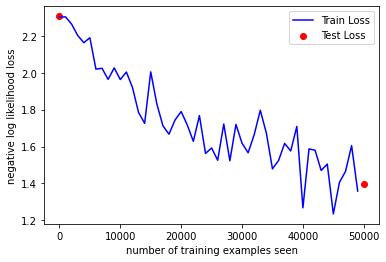

In [20]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

#### Predict ####

In [21]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [22]:
model = torch.load(data_path+'model_final')

In [23]:
def classify(model,image,classes):
    image = io.imread(image)
    image = transform.resize(image,(32,32,3))
    #image = image/255
    image = rgb2gray(image)
    image = image.reshape(1,32,32)
    
    model = model.eval()
    image = torch.from_numpy(image)
    
    image = image.float()
    image = image.unsqueeze(0)
    output = model(image)
    _,predicted = torch.max(output.data,1)
    print(classes[predicted.item()])

In [24]:
pics = ['airplane.jpg','automobile.jpg','bird.jpeg','cat.jpg','deer.jpg','dog.jpg','frog.jpg','horse.jpg','ship.jpg','truck.jpeg']

for i in pics:
    classify(model,i,classes)

airplane
automobile
bird
ship
deer
horse
frog
horse
ship
truck


In [25]:
pics

['airplane.jpg',
 'automobile.jpg',
 'bird.jpeg',
 'cat.jpg',
 'deer.jpg',
 'dog.jpg',
 'frog.jpg',
 'horse.jpg',
 'ship.jpg',
 'truck.jpeg']

#### a. Explain in detail the strategy used in implementing the Dataset class. The answer should clearly describe how the data is being accessed in the __init__ function, and how it is delivered to the DataLoader It should also explain the processing I am doing on the images in the __get_item__ method.

   The __init__ function within the class "cifar" acts as an initialization function which allows the "cifar" class to be instantiated as a new object with Dataset methods and attributes. When the class object is instantiated with a data input, the class immediately creates an image and label attribute with corresponding image or label dataframes of the dataset. Additionally within class "cifar," there are two methods that can be called: __len__ and __getitem__. The "len" method returns the length of the labels/(length of dataset). For the "getitem" method, an index integer must be inputted. After inputting an index, the "getitem" method will retrieve the image data and convert the image into a grayscale, 32 by 32 image. This method will then return the datatype and new size of both the image and label.


This instantiating of the Dataset class allows for the PyTorch modules Dataset and DataLoader to be easier used in conjuction. The Dataloader module requires a Dataset input, so the Dataset class allows for easier iteration and visualization of the data.


#### b. Describe in brief, the 3 main things that this complete application is doing, and the parameters one can tweak to build a good final model.

The 3 main part of this application include the pre-processing of data, the building of the Convolutional Neural Network (CNN), and the reiterative training and testing of the model to decrease the loss function.

To build a better final model, the CNN parameters can be adjusted to increase the accuracy or speed of the model. Parameters that can be adjusted include the number of Convolutional Layers, the amount of channels/features per layer, and the size of the kernel filters per layer. Additionally to increase speed and decrease computational complexity, one can adjust the Pooling layers to reduce the amount of parameters that are processed.


#### c. How accurate were your predictions on percentage basis?

The accuracy of the test set from the CIFAR dataset was about 53%.

For the image predictions, there were 10 images that were inputted into the model. 8 out of the 10 were predicted correctly, so the predictions were 80% accurate.

The cat was misclassified as a ship and the truck was classfied as a cat.


#### d. What were the challenges you faced while completing this HW and what helped you in putting it together?

The initial issue with this project was installing PyTorch and checking if there was a need for virtual environments. Since most of the packages needed for this project were on my base environment, I was able to start working and loading in the directory information.

The second main issue of the project was writing the actual CNN and making sure that I calculated the image size as it passed through the 3 convolutional layers and the pool layers. I ran into an issue were the batch size of the input did not match the target of 100 within the train and test of the model. As a result, I had to go back and correct the size of the image that was returned. However, most of the layer writing was straightforward; I just occasionally had to read PyTorch documentation and refer to the MNIST example shown in class.

Overall, the project was very useful on learning how to properly organize data and create CNNs.

